# 안녕하세요:)

## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [148]:
import pandas as pd

In [149]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [106]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [84]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [152]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_bus_station.rename(columns={'구 이름':'자치구'}, inplace=True)
df_seoul_bus_station.head()

,자치구,버스정류장개수,노선개수,승차총승객수,하차총승객수,승차총승객수평균,하차총승객수평균
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [277]:
df_seoul_moving = pd.read_csv('df_seoul_moving_seoul.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving.head()

,도착 시군구 코드,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합) 평균
0,11010,10239340,19809988.63,21.443330,41.486279
1,11020,10285410,20275545.43,21.166269,41.724896
2,11030,9488120,15247193.24,21.553622,34.636181
3,11040,9952210,18076235.50,21.950757,39.869241
4,11050,9761770,18715186.44,22.779081,43.671869


In [167]:
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8', thousands=',')
df_seoul_business.head()

,자치구,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,용달 화물자동차 운송업.1,부동산 중개 및 대리업,부동산 중개 및 대리업.1,두발미용업,...,커피전문점,커피전문점.1,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업.1,기타주점업,기타주점업.1,일반 교과 학원,일반 교과 학원.1,한식 육류요리 전문점,한식 육류요리 전문점.1
0,종로구,215,215,1548,5912,618,646,549,889,261,...,948,3613,400,962,537,1413,110,382,437,1982
1,중구,230,235,1588,6414,300,333,576,1152,339,...,869,3542,10810,24248,381,982,57,175,443,2121
2,용산구,416,523,857,2987,455,466,791,1214,366,...,634,2076,54,317,487,1332,104,573,300,1184
3,성동구,1200,2527,956,2785,1072,1161,801,1453,489,...,547,1859,149,1572,285,621,258,1494,400,1545
4,광진구,1119,1744,963,2861,968,985,871,1313,746,...,590,1887,89,687,633,1577,413,1646,467,1678


In [168]:
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')
df_seoul_people.head()

,자치구,세대,총인구,남자 합계,여자 합계,한국인 합계,한국인 남자 합계,한국인 여자 합계,외국인 합계,외국인 남자 합계,외국인 여자 합계,세대당인구,65세이상고령자
0,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
1,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742
2,용산구,111207,236518,114571,121947,222169,106735,115434,14349,7836,6513,2.00,39461
3,성동구,134533,291609,141662,149947,285073,138847,146226,6536,2815,3721,2.12,46896
4,광진구,169483,353110,169525,183585,340707,164346,176361,12403,5179,7224,2.01,52604


In [278]:
df = pd.merge(standard,df_seoul_bus_station,how='inner', on='자치구')

In [279]:
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

---

In [280]:
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')

In [281]:
df = pd.merge(df,df_seoul_people,how='inner', on='자치구')

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   도착 시군구 코드          25 non-null     int64  
 1   자치구                25 non-null     object 
 2   버스정류장개수            25 non-null     int64  
 3   노선개수               25 non-null     int64  
 4   승차총승객수             25 non-null     int64  
 5   하차총승객수             25 non-null     int64  
 6   승차총승객수평균           25 non-null     float64
 7   하차총승객수평균           25 non-null     float64
 8   총 이동 시간            25 non-null     int64  
 9   총 이동 인구            25 non-null     float64
 10  평균 이동 시간(분)        25 non-null     float64
 11  이동인구(합) 평균         25 non-null     float64
 12  택시운송업              25 non-null     int64  
 13  택시운송업.1            25 non-null     int64  
 14  한식 일반 음식점업         25 non-null     int64  
 15  한식 일반 음식점업.1       25 non-null     int64  
 16  용달 화물자동차 운송업       25 non-nu

In [174]:
df

,도착 시군구 코드,자치구,버스정류장개수,노선개수,승차총승객수,하차총승객수,승차총승객수평균,하차총승객수평균,총 이동 시간,총 이동 인구,...,남자 합계,여자 합계,한국인 합계,한국인 남자 합계,한국인 여자 합계,외국인 합계,외국인 남자 합계,외국인 여자 합계,세대당인구,65세이상고령자
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,10239340,19809988.63,...,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,10285410,20275545.43,...,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,9488120,15247193.24,...,114571,121947,222169,106735,115434,14349,7836,6513,2.00,39461
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,9952210,18076235.50,...,141662,149947,285073,138847,146226,6536,2815,3721,2.12,46896
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,9761770,18715186.44,...,169525,183585,340707,164346,176361,12403,5179,7224,2.01,52604
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,9998260,16987577.97,...,172318,180274,337982,166823,171159,14610,5495,9115,1.99,62963
6,11070,중랑구,380,48,3792541,3740923,87.403863,86.214261,9102380,14518503.71,...,193623,199977,389043,191835,197208,4557,1788,2769,2.07,72851
7,11080,성북구,602,99,6236424,6231238,123.251922,123.149430,10314120,19524264.96,...,212277,230403,433150,208691,224459,9530,3586,5944,2.20,75719
8,11090,강북구,413,67,4825181,4671783,133.020373,128.791504,8765160,13079023.71,...,145934,154890,297384,144643,152741,3440,1291,2149,2.05,64961
9,11100,도봉구,359,46,3304305,3211421,106.859356,103.855540,8053130,11243990.02,...,154440,163660,316098,153716,162382,2002,724,1278,2.28,65122


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

plt.figure(figsize = (100, 100))

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')  
sns.heatmap(df.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1 : 
H0 : 이동인구 평균은 버스정류장개수는 연관이 없다
H1 : 이동인구 평균은 버스정류장개수는 연관이 있다

* 가설 2 : 

H0 : 한식 일반 음식점업 종사자 수는 노선개수는 연관이 없다
H1 : 한식 일반 음식점업 종사자 수는 노선개수와 연관이 있다

* 가설 3

H0 : 승차총승객수는 버스정류장개수와 연관이 없다.
H1 : 승차총승객수는 버스정류장개수와 연관이 있다.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   도착 시군구 코드          25 non-null     int64  
 1   자치구                25 non-null     object 
 2   버스정류장개수            25 non-null     int64  
 3   노선개수               25 non-null     int64  
 4   승차총승객수             25 non-null     int64  
 5   하차총승객수             25 non-null     int64  
 6   승차총승객수평균           25 non-null     float64
 7   하차총승객수평균           25 non-null     float64
 8   총 이동 시간            25 non-null     int64  
 9   총 이동 인구            25 non-null     float64
 10  평균 이동 시간(분)        25 non-null     float64
 11  이동인구(합) 평균         25 non-null     float64
 12  택시운송업.1            25 non-null     int64  
 13  한식 일반 음식점업.1       25 non-null     int64  
 14  용달 화물자동차 운송업.1     25 non-null     int64  
 15  부동산 중개 및 대리업.1     25 non-null     int64  
 16  두발미용업.1            25 non-nu

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [58]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="NanumGothicCoding",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

In [59]:
temp = df.iloc[[1,2,3,4,11,13],[1,2,3,4,11,13]]
temp


,자치구,버스정류장개수,노선개수,승차총승객수,이동인구(합) 평균,한식 일반 음식점업.1
1,중구,178,103,3776675,44.516072,6414
2,용산구,323,67,4189977,36.903883,2987
3,성동구,435,58,2807280,42.685596,2785
4,광진구,269,41,2749448,46.762548,2861
11,은평구,501,71,5201660,50.260428,2585
13,마포구,562,97,5088461,54.884906,4705


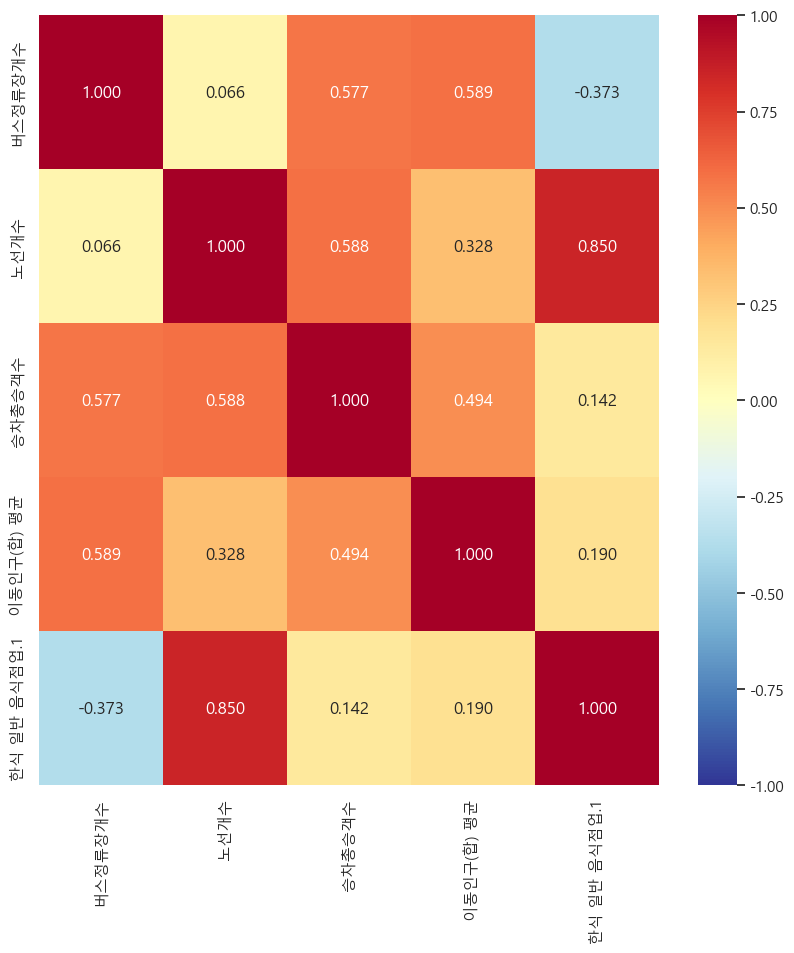

In [61]:
plt.figure(figsize = (10, 10))
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')  
sns.heatmap(temp.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()

### 1) 이동인구 평균은 버스정류장개수는 연관이 있다
0.589
 

### 2) 한식 일반 음식점업 종사자 수는 노선개수는 연관이 있다
0.850

### 3) 승차총승객수는 버스정류장개수와 연관이 있다.
0.577

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [66]:
import scipy.stats as spst
spst.pearsonr(df['이동인구(합) 평균'],df['버스정류장개수'])

PearsonRResult(statistic=0.3747226841684219, pvalue=0.06495098507568636)

p-value > 0.05 -> 귀무가설 기각 X -> 대립가설이 틀림

In [69]:
spst.pearsonr(df['한식 일반 음식점업.1'],df['노선개수'])

PearsonRResult(statistic=0.41355583148989006, pvalue=0.03988391106862527)

p-value > 0.05 -> 귀무가설 기각 X -> 대립가설 맞음

In [231]:
spst.pearsonr(df['승차총승객수'],df['버스정류장개수'])


PearsonRResult(statistic=0.5666813370974585, pvalue=0.003141977397117322)

In [234]:
temp2 = df.loc[]

KeyError: "None of [Index([(106, 103, 67, 58, 41, 73, 48, 99, 67, 46, 57, 71, 107, 97, 56, 49, 79, 58, 101, 94, 86, 93, 91, 55, 21), (537, 381, 487, 285, 633, 499, 535, 512, 580, 258, 355, 484, 497, 1011, 415, 794, 576, 391, 636, 439, 658, 446, 713, 628, 589)], dtype='object')] are in the [index]"

In [ ]:
plt.figure(figsize = (10, 10))
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')  
sns.heatmap(temp2.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()

p-value > 0.05 -> 귀무가설 기각 X -> 대립가설 맞음

In [96]:
# 노선수와 주점사업체수
# 버스정류장개수와 주점사업체수
# 주점사업체수와 총이동인구
# ============= 야간시간 제외 =================

In [259]:
print(spst.pearsonr(df['노선개수'],df['기타주점업']))
print(spst.pearsonr(df['기타주점업'],df['버스정류장개수']))
print(spst.pearsonr(df['기타주점업'],df['총 이동 인구']))

PearsonRResult(statistic=0.14732845674186884, pvalue=0.4821937415104064)
PearsonRResult(statistic=0.36697158696218213, pvalue=0.07115719485759615)
PearsonRResult(statistic=0.446980486978646, pvalue=0.02508264851131259)


In [175]:
# 노선수와 주점사업체수
# 버스정류장개수와 주점사업체수
# 주점사업체수와 총이동인구
# ============= 야간시간 포함 =================

In [287]:
print(spst.pearsonr(df['노선개수'],df['기타주점업']))
print(spst.pearsonr(df['기타주점업'],df['버스정류장개수']))
print(spst.pearsonr(df['기타주점업'],df['총 이동 인구']))


PearsonRResult(statistic=0.14732845674186884, pvalue=0.4821937415104064)
PearsonRResult(statistic=0.36697158696218213, pvalue=0.07115719485759615)
PearsonRResult(statistic=0.4520919275069978, pvalue=0.023274505465892152)
PearsonRResult(statistic=0.35458412598460753, pvalue=0.08200397059891416)


In [ ]:
# 노선수와 주점사업체수
# 버스정류장개수와 주점사업체수
# 주점사업체수와 총이동인구
# ============= 야간시간만 =================

In [251]:
print(spst.pearsonr(df['노선개수'],df['기타주점업']))
print(spst.pearsonr(df['기타주점업'],df['버스정류장개수']))
print(spst.pearsonr(df['기타주점업'],df['총 이동 인구']))

PearsonRResult(statistic=0.14732845674186884, pvalue=0.4821937415104064)
PearsonRResult(statistic=0.36697158696218213, pvalue=0.07115719485759615)
PearsonRResult(statistic=0.5590418346960516, pvalue=0.0036717238657614027)


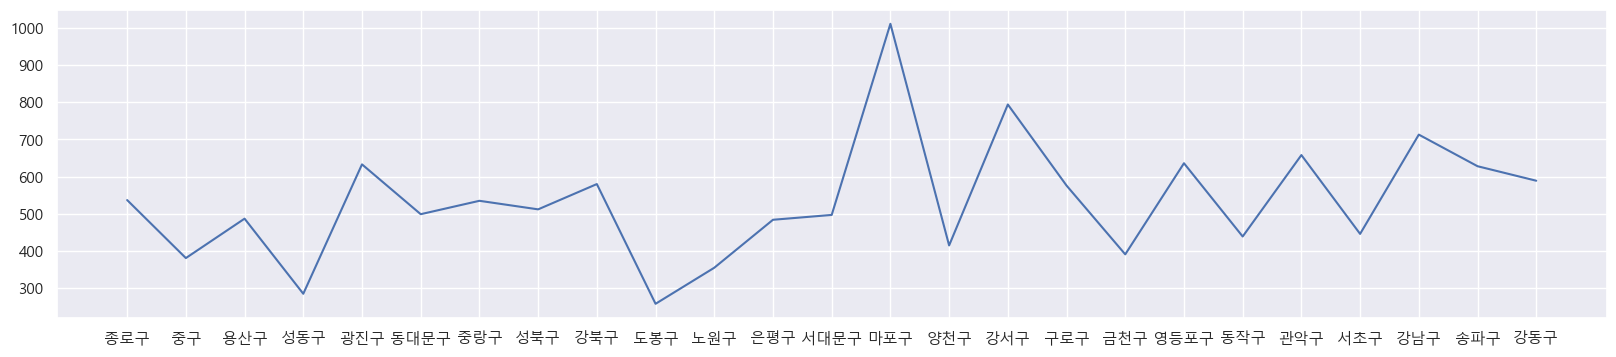

In [235]:
plt.figure(figsize=(20,4))
plt.plot('자치구', '기타주점업', data = df)

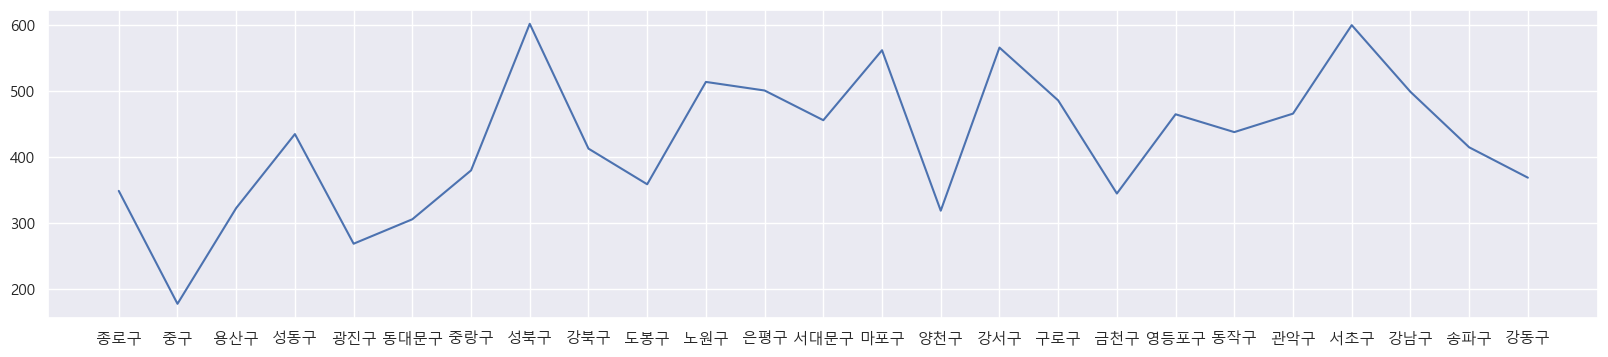

In [238]:
plt.figure(figsize=(20,4))
plt.plot('자치구', '버스정류장개수', data = df)

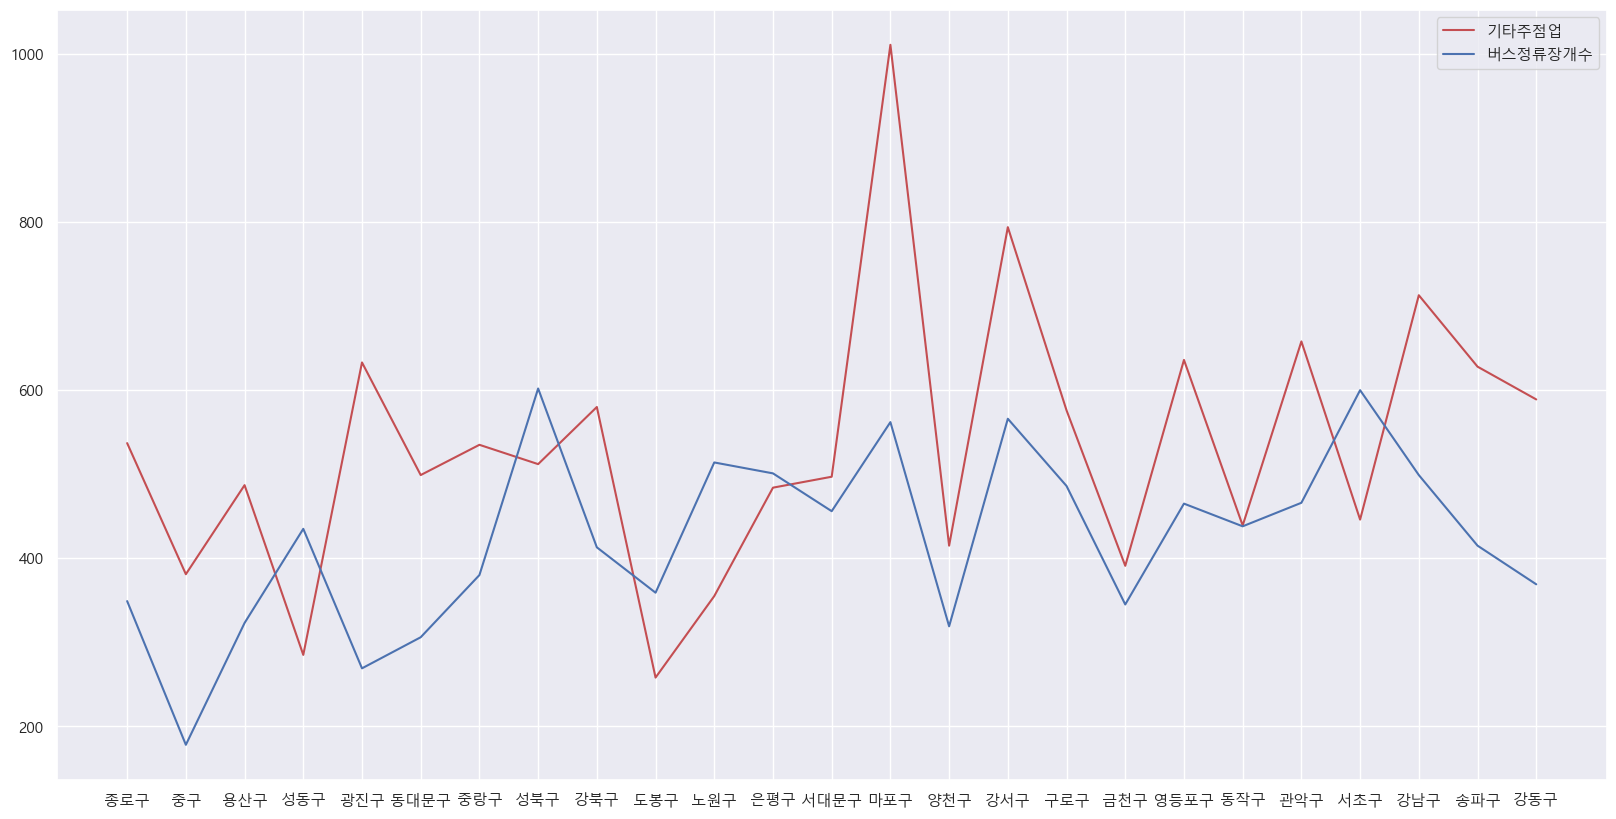

In [253]:
plt.figure(figsize = (20,10))
plt.plot(df['자치구'], df['기타주점업'], color = 'r', label = '기타주점업')
plt.plot(df['자치구'], df['버스정류장개수'], color = 'b', label = '버스정류장개수')

#plt.axhline(m4_data['정류장수'].mean(), color = 'black', label = '정류장수 평균')
#plt.axhline(m4_data['기타주점업사업체수'].mean(), color = 'green', label = '기타주점업사업체수') 
plt.legend()
plt.show()

In [242]:
temp3 = df['버스정류장개수'] / df['기타주점업']
temp3

0     0.649907
1     0.467192
2     0.663244
3     1.526316
4     0.424961
5     0.613226
6     0.710280
7     1.175781
8     0.712069
9     1.391473
10    1.447887
11    1.035124
12    0.917505
13    0.555885
14    0.768675
15    0.712846
16    0.843750
17    0.882353
18    0.731132
19    0.997722
20    0.708207
21    1.345291
22    0.699860
23    0.660828
24    0.626486
dtype: float64

PearsonRResult(statistic=0.3585105177243193, pvalue=0.0784387882253214)


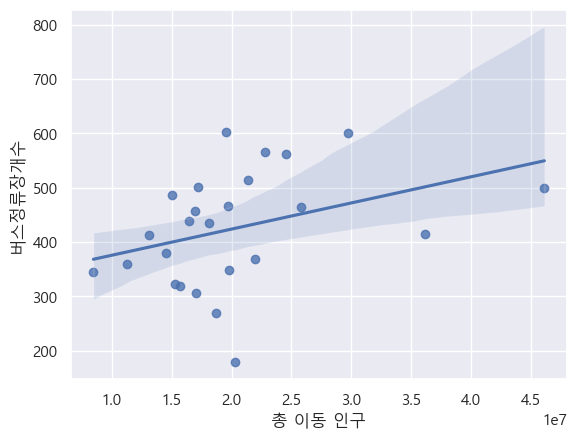

In [293]:
print(spst.pearsonr(df['총 이동 인구'], df['버스정류장개수']))
sns.regplot(x='총 이동 인구', y='버스정류장개수', data = df)
plt.show()

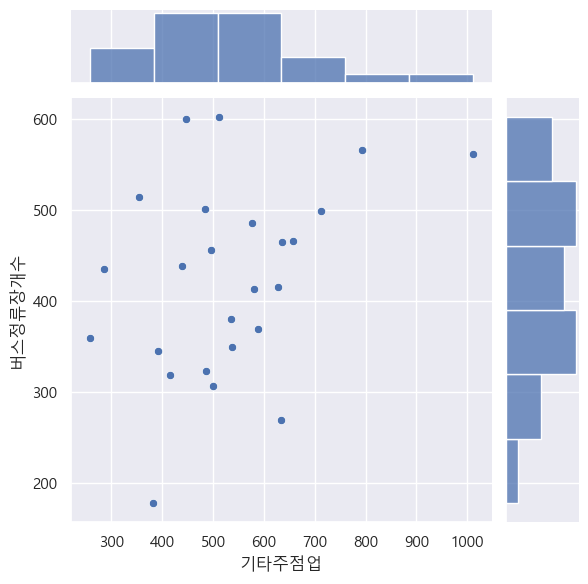

In [223]:
# 야간시간 제외 기준
sns.jointplot(x='기타주점업', y='버스정류장개수', data = df)
plt.show()

PearsonRResult(statistic=0.3585105177243193, pvalue=0.0784387882253214)


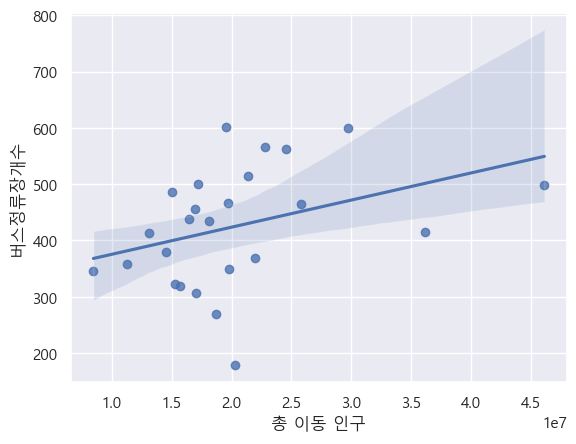

In [291]:
print(spst.pearsonr(df['버스정류장개수'],df['총 이동 인구']))
sns.regplot(x='총 이동 인구', y='버스정류장개수', data = df)
plt.show()

In [ ]:
print(spst.pearsonr(df['총 이동 인구'],df['승차총승객수']))

### 1)

### 2)

### 3)

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



<AxesSubplot:xlabel='이동인구(합) 평균', ylabel='버스정류장개수'>

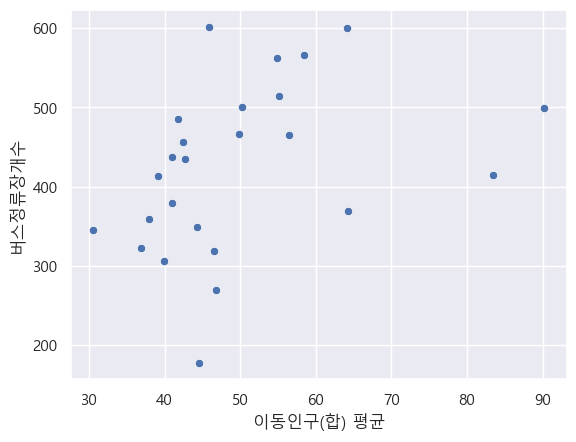

In [78]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst
sns.scatterplot(x = '이동인구(합) 평균', y = '버스정류장개수', data = df)

#spst.pearsonr(X,Y)

<AxesSubplot:xlabel='한식 일반 음식점업.1', ylabel='노선개수'>

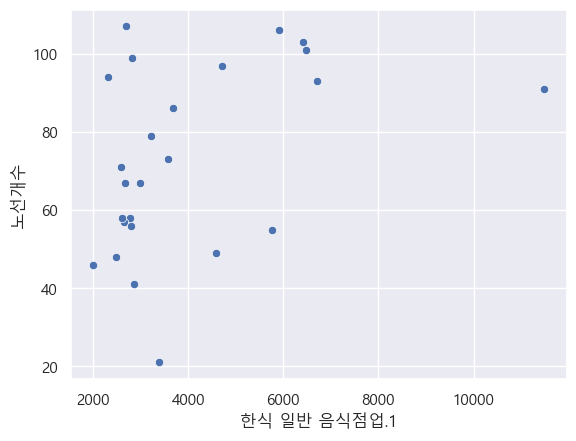

In [80]:
sns.scatterplot(x = '한식 일반 음식점업.1', y = '노선개수', data = df)

In [ ]:
sns.scatterplot(x = '승차총승객수', y = '노선개수', data = df)

In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.

sns.heatmap(seoul_bus_station.corr(), annot = True)
plt.show()

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

## 4.관계 정리

### 1) 강한 관계의 변수

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

KeyError: '총 유동인구 수'